In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# And libraries for data transformation
import datetime

#words counter
from collections import Counter
import re

In [2]:
df = pd.read_csv('src/us_correlation_analysis.csv')
df

,date,tweets,cases,sentiment_pos,sentiment_neg,sentiment_neut,sentiment_us,cases_daily,tweets_daily
0,1/22/20,5070,1,0.595661,0.178698,0.225641,0.416963,1,5070
1,1/23/20,29788,1,0.438628,0.243669,0.317704,0.194959,0,24718
2,1/24/20,104594,2,0.453894,0.201414,0.344692,0.252480,1,74806
3,1/25/20,189463,2,0.424336,0.217830,0.357834,0.206506,0,84869
4,1/26/20,297655,5,0.427416,0.224370,0.348214,0.203046,3,108192
...,...,...,...,...,...,...,...,...,...
102,5/04/20,13601803,1180375,0.407621,0.273369,0.319010,0.134251,22335,115686
103,5/05/20,13724102,1204351,0.426978,0.247018,0.326004,0.179961,23976,122299
104,5/06/20,13848764,1229331,0.421155,0.257087,0.321758,0.164068,24980,124662
105,5/07/20,13967566,1257023,0.434942,0.260214,0.304843,0.174728,27692,118802


In [3]:
# view data in every # of rows
# every 5 rows
df_tweets_cases_select = df.iloc[::5, :]
df_tweets_cases_select

,date,tweets,cases,sentiment_pos,sentiment_neg,sentiment_neut,sentiment_us,cases_daily,tweets_daily
0,1/22/20,5070,1,0.595661,0.178698,0.225641,0.416963,1,5070
5,1/27/20,399158,5,0.448351,0.235234,0.316414,0.213117,0,101503
10,2/01/20,1120017,8,0.372810,0.239826,0.387364,0.132983,1,58263
15,2/06/20,1630998,11,0.352825,0.266098,0.381077,0.086726,0,87851
20,2/11/20,2372125,12,0.349575,0.315780,0.334645,0.033795,1,166505
25,2/16/20,2973001,13,0.359475,0.274775,0.365749,0.084700,0,95478
30,2/21/20,3658804,15,0.421499,0.192298,0.386203,0.229200,2,154354
35,2/27/20,4462109,16,0.350557,0.290229,0.359214,0.060328,1,270173
40,3/03/20,6970782,73,0.450506,0.247334,0.302160,0.203172,20,395178
45,3/08/20,7765907,450,0.404148,0.264855,0.330997,0.139293,114,105454


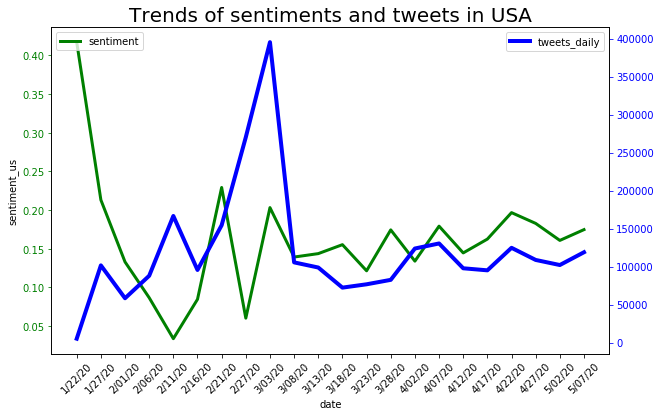

In [4]:
# plot every 5 rows
plt.figure(figsize=(10, 6))
ax_pos = sns.lineplot(x='date',
                      y='sentiment_us', 
                      data=df_tweets_cases_select,
                      label='sentiment',
                      color='green',
                      lw=3)

ax_pos.legend(loc=2)
ax_pos.tick_params(axis='y', colors='green')

plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases_select.plot(x='date',
                     y='tweets_daily',
                     ax=ax2,
                     label='tweets_daily', 
                     style='b',
                     lw=4)
ax2.tick_params(axis='y', colors='blue')

plt.title("Trends of sentiments and tweets in USA", fontsize=20, ha='center')
plt.xticks(rotation=45)
plt.show()

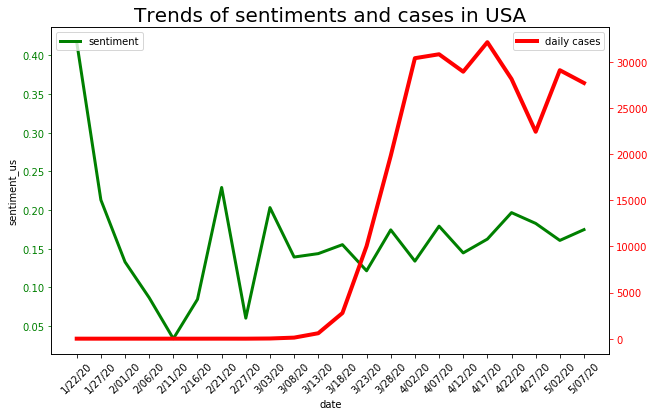

In [5]:
# plot every 5 rows
plt.figure(figsize=(10,6))
ax_pos = sns.lineplot(x='date',
                      y='sentiment_us', 
                      data=df_tweets_cases_select,
                      label='sentiment',
                      color='green',
                      lw=3)

ax_pos.legend(loc=2)
ax_pos.tick_params(axis='y', colors='green')

plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases_select.plot(x='date',
                     y='cases_daily',
                     ax=ax2,
                     label='daily cases', 
                     style='r',
                     lw=4)
ax2.tick_params(axis='y', colors='red')

plt.title("Trends of sentiments and cases in USA", fontsize=20, ha='center')
plt.xticks(rotation=45)
plt.show()

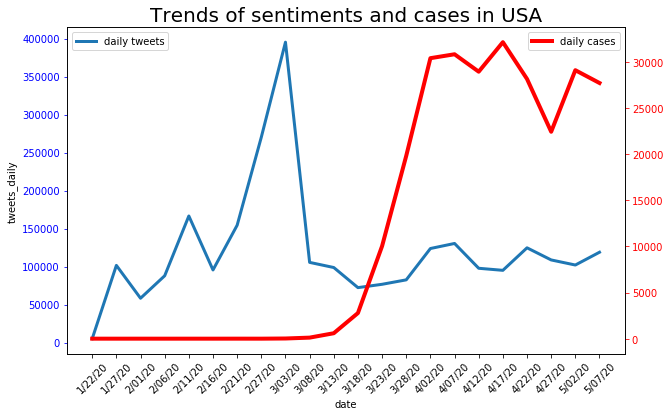

In [6]:
# plot every 5 rows
# Trends of sentiments and cases in USA
plt.figure(figsize=(10, 6))
ax_pos = sns.lineplot(x='date',
                      y='tweets_daily', 
                      data=df_tweets_cases_select,
                      label='daily tweets',
                      lw=3)

ax_pos.legend(loc=2)
ax_pos.tick_params(axis='y', colors='blue')

plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases_select.plot(x='date',
                     y='cases_daily',
                     ax=ax2,
                     label='daily cases', 
                     style='r',
                     lw=4)
ax2.tick_params(axis='y', colors='red')

plt.title("Trends of sentiments and cases in USA", fontsize=20, ha='center')
plt.xticks(rotation=45)
plt.show()